# <p align="center">**ETL (Extract, Transform, Load) & EDA (Explatory Data Analysis**</p>

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/muhtarmuhtar/Documents/vscode-projects/CreditCardCust-Churn/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/muhtarmuhtar/Documents/vscode-projects/CreditCardCust-Churn'

# Setup

Import all the Python libraries required to carry out ETL (Extract, Transform, Load) and EDA (Exploratory Data Analysis).

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline # For building machine learning pipelines
from feature_engine.selection import DropFeatures, DropDuplicateFeatures # For feature selection
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer # For handling missing data
from feature_engine.imputation import ArbitraryNumberImputer # For handling missing data
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder # For encoding categorical variables
from feature_engine.transformation import LogTransformer # For transforming numerical variables
from feature_engine.outliers import Winsorizer # For handling outliers
import joblib # For saving and loading models

sns.set_theme(style="whitegrid") # Set seaborn theme for plots
pd.set_option('display.max_columns', None) # Display all columns in pandas DataFrames
# random_state = 1 # For reproducibility

---

# Extract

1. Import the raw dataset (`BankChurners.csv`) into a DataFrame.  
2. Create a copy of the raw data to preserve the original.  
3. Check the dataset’s dimensions (rows and columns).  
4. Preview the first few rows to understand the structure and content.  

In [22]:
# Load the raw data
df_raw = pd.read_csv('Dataset/Raw/BankChurners.csv')

# Make a copy of the raw data
df = df_raw.copy()

# Display the shape and first few rows of the dataframe
print(f'Row: {df.shape[0]}, Column: {df.shape[1]}')
df.head()

Row: 10127, Column: 23


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


---

# Initial Exploration (EDA)

The purpose of the Exploratory Data Analysis (EDA) section is to understand the dataset by exploring its characteristics, identifying patterns, detecting outliers, and generating hypotheses. I will use statistical summaries and visualisations to describe and analyse the data. The insights gained from the EDA will guide further analysis, modelling, and informed decision-making.

In [ ]:
# # Remove the last two columns which are not needed for analysis
# df.drop(df.columns[-2:], axis=1, inplace=True)

In [23]:
# Rename columns
df.rename(columns=
          {"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "NB_attrition_flag_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "NB_attrition_flag_2"}, inplace=True)


In [24]:
# Display the shape and first few rows of the dataframe
print(f'Row: {df.shape[0]}, Column: {df.shape[1]}')
df.head()

Row: 10127, Column: 23


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_attrition_flag_1,NB_attrition_flag_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Missing Values Heatmap indicates there are no missing values in the dataframe. 

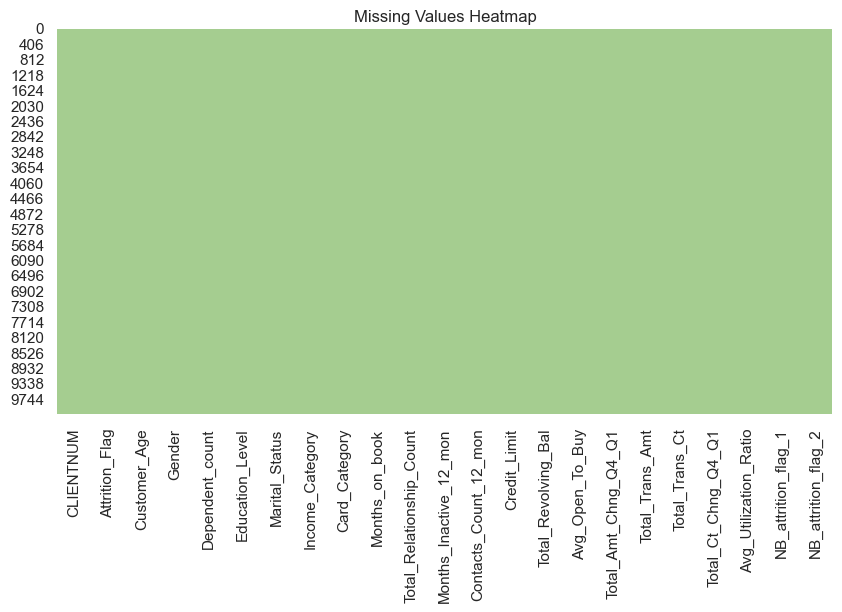

In [25]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='crest')
plt.title("Missing Values Heatmap")
plt.show()

In [26]:
# Numeric summary statistics of the dataframe
# Transpose for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


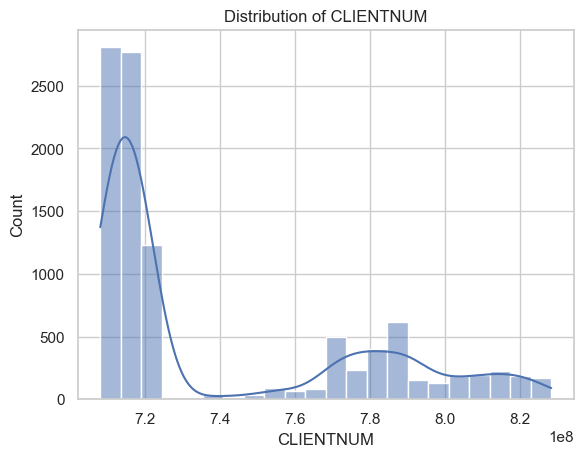

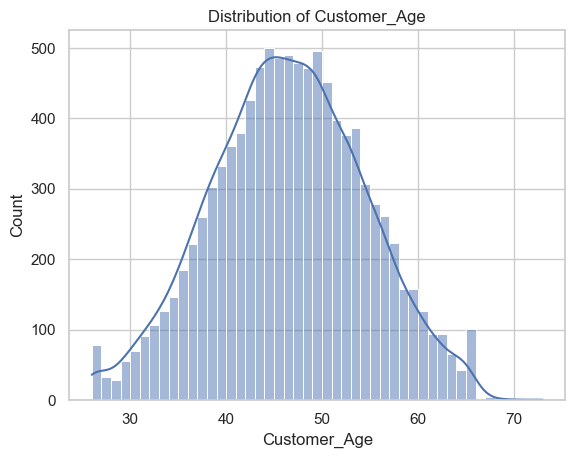

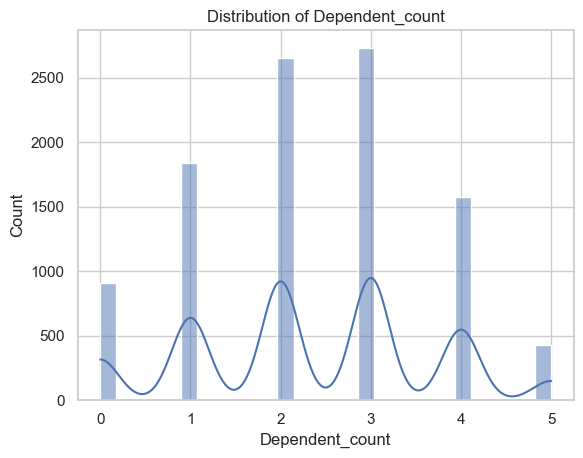

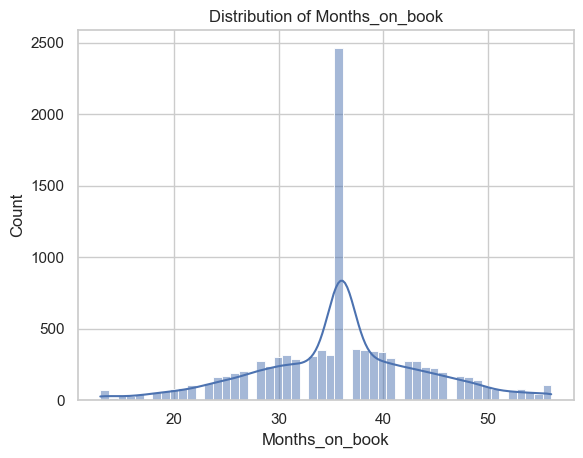

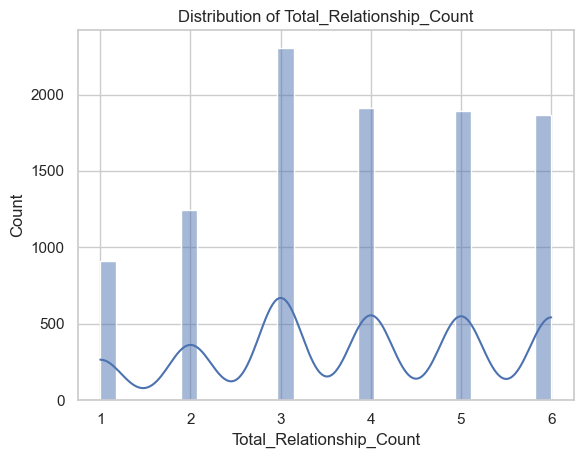

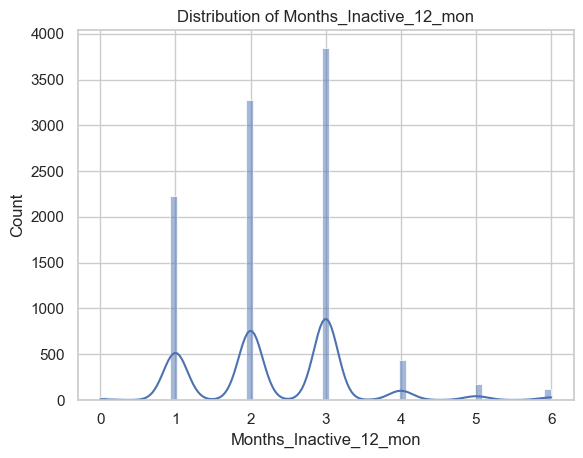

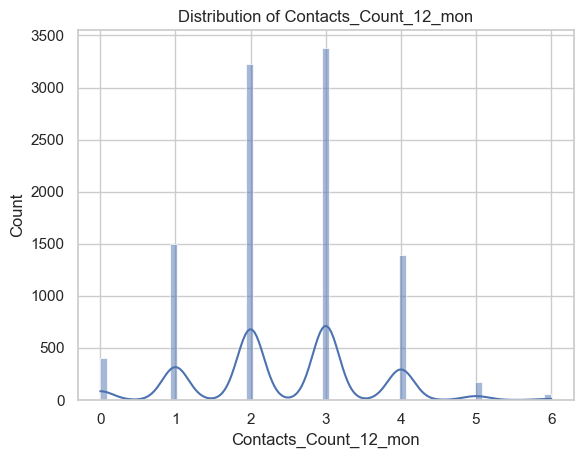

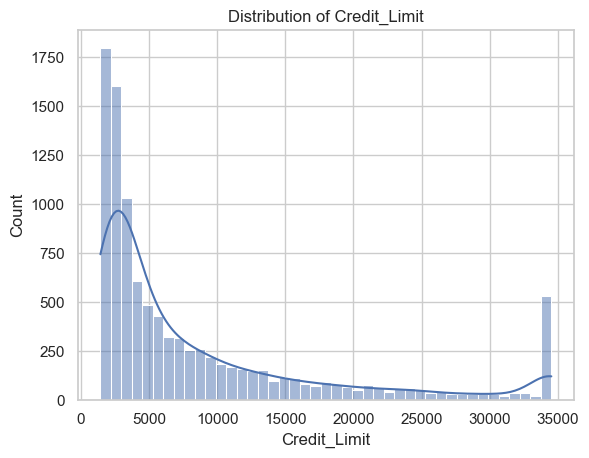

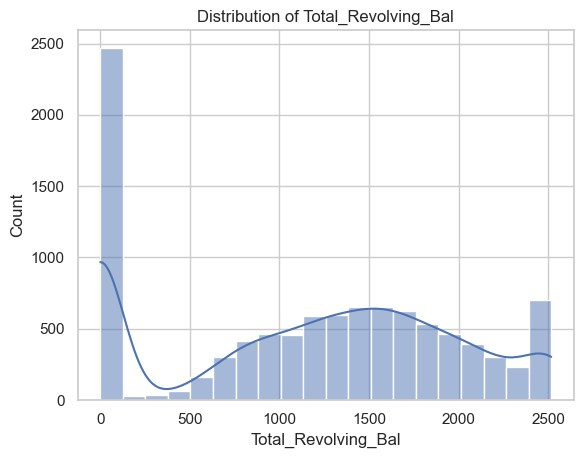

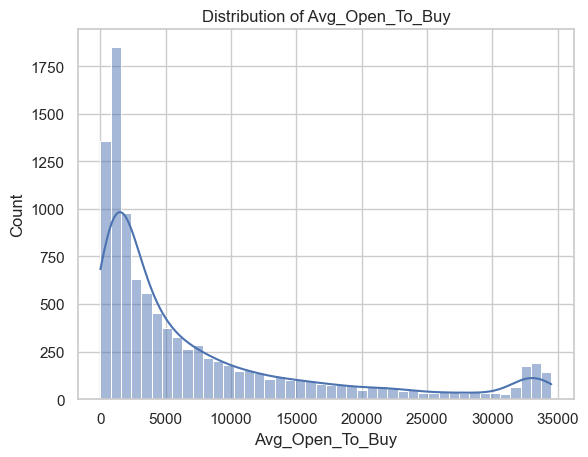

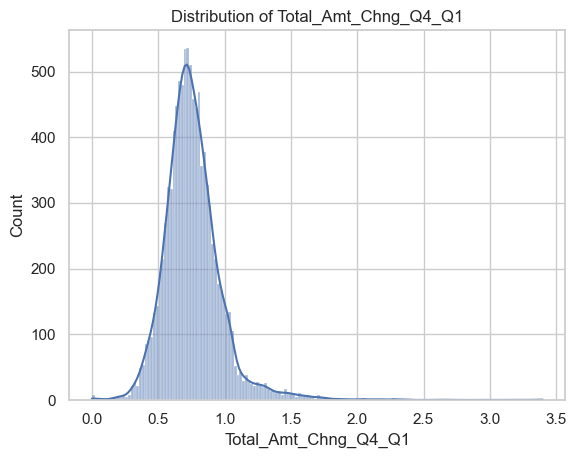

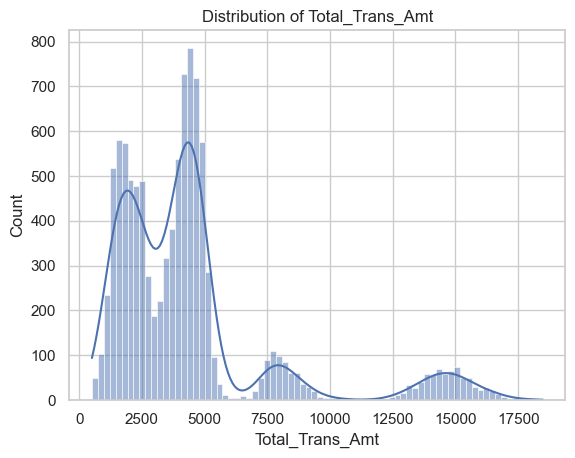

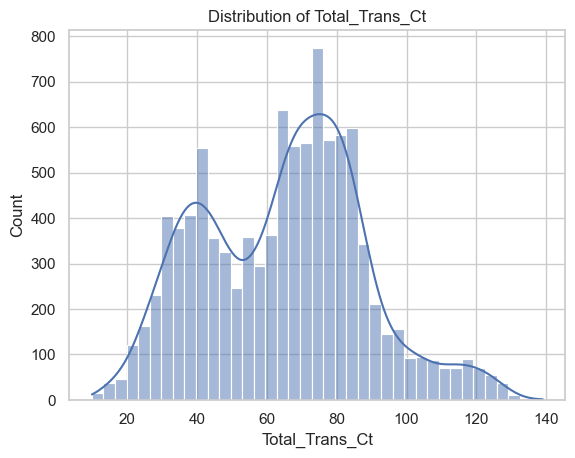

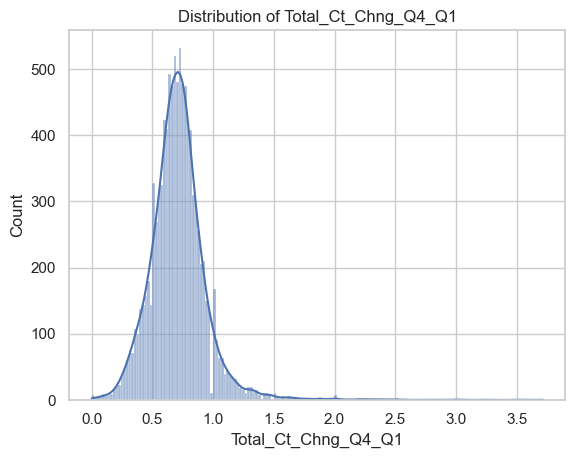

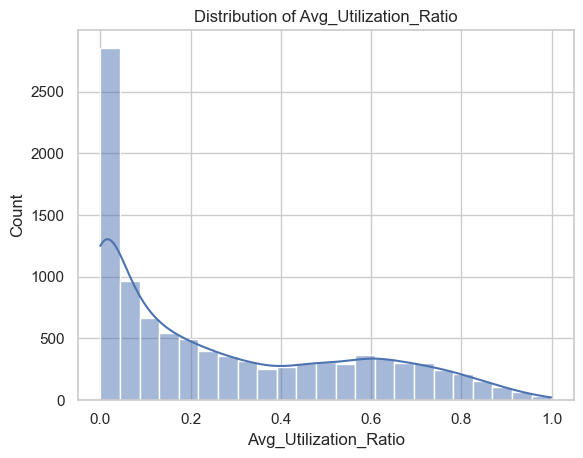

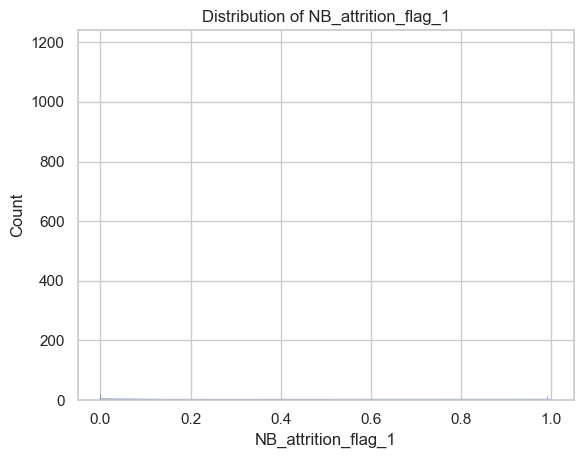

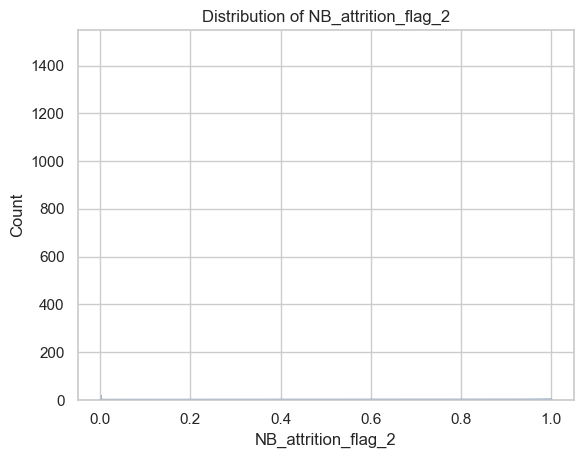

In [27]:
# Distribution plots for numerical variables
num_vars = df.select_dtypes(include=["int64", "float64"]).columns
for col in num_vars:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [29]:
# Categorical summary statistics of the dataframe
# Transpose for better readability
df.describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


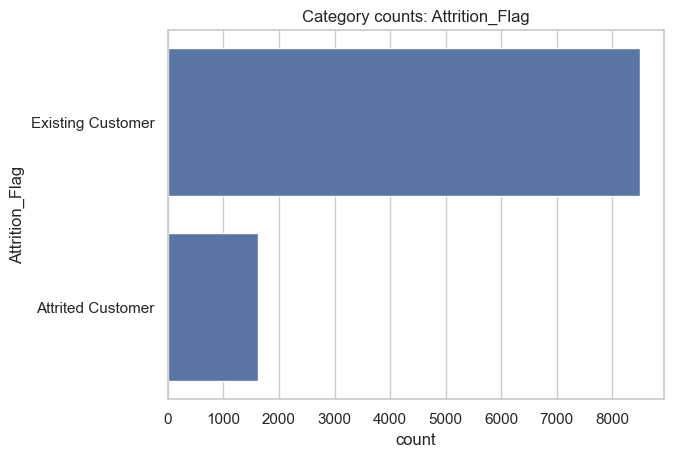

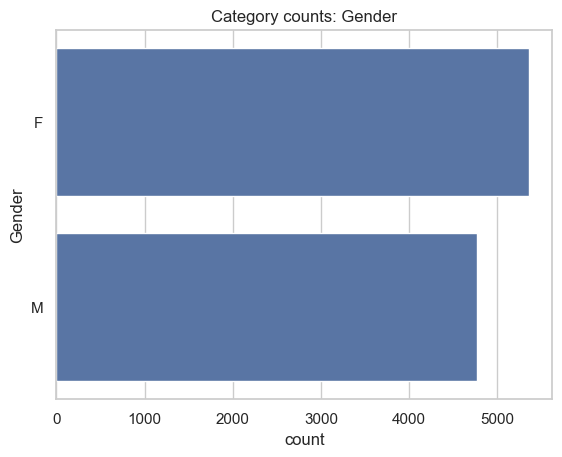

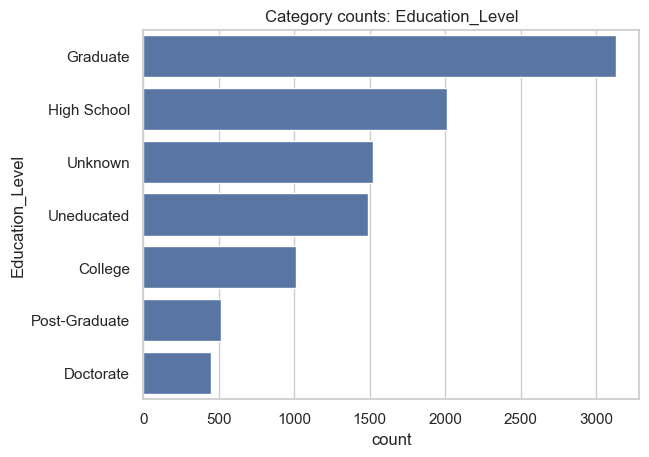

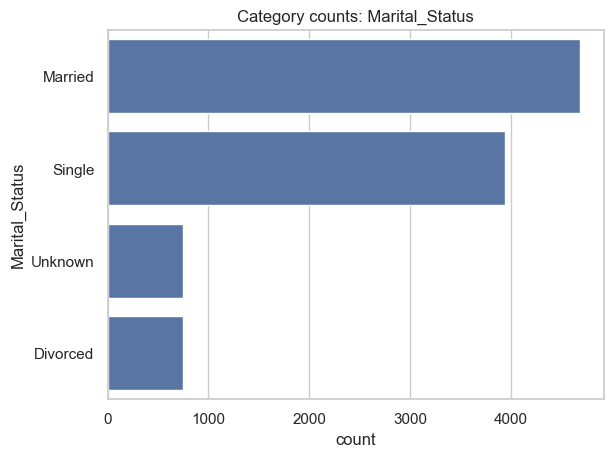

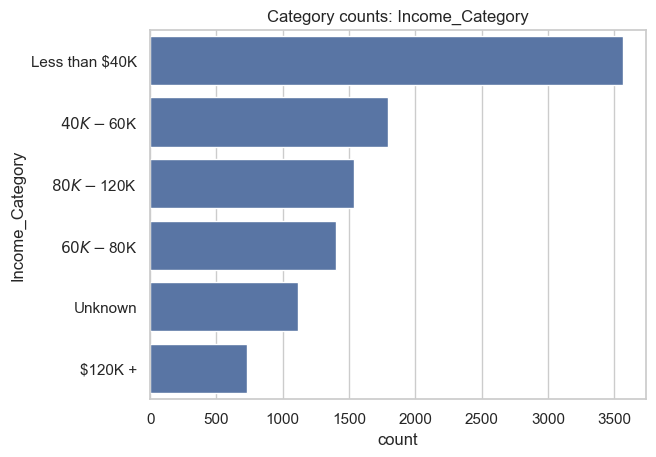

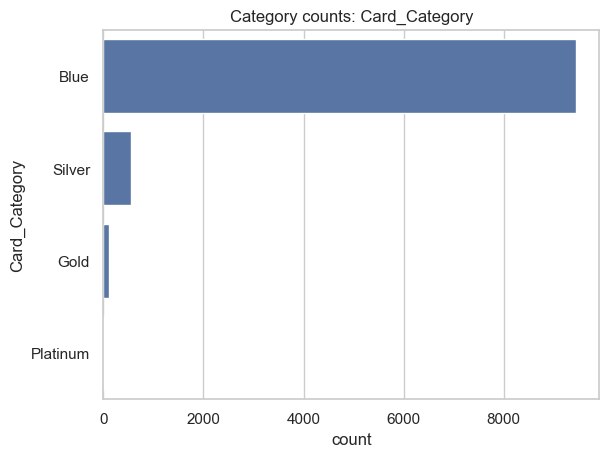

In [30]:
# Count plots for categorical variables
cat_vars = df.select_dtypes(include=["object", "category"]).columns
for col in cat_vars:
    plt.figure()
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Category counts: {col}")
    plt.show()

---

# Transform

An ETL pipeline is used for cleaning, transforming, and encoding datasets in a reproducible manner.

This pipeline prepares your raw data for modeling by performing the following steps:

1. Filling in missing values: using the median or mean for numerical data and the most frequent value for categorical data.
2. Handling outliers through IQR (Interquartile Range) winsorization.
3. Reducing skewness in positive numerical columns with log transformation.
4. Converting categorical variables into machine-readable formats using one-hot encoding.
5. Dropping irrelevant columns.


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
# import os
# try:
#   # create your folder here
#   # os.makedirs(name='')
# except Exception as e:
#   print(e)
